# DecisionTree

In this notebook, we will try to use Decision Tree

### Load and prepare the dataset

In [1]:
from preprocess_data import get_HITL, clean_HITL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

BASE_PATH = "../../data/"
random_state = 42

In [2]:
hitl_dict = get_HITL("../../data/HardwareInTheLoop/", small=True)
df_network, df_physical = clean_HITL(hitl_dict) # Clean-up helper function

print("Network dataset shape: ", df_network.shape)
print("Physical dataset shape: ", df_physical.shape)

Network dataset shape:  (243065, 17)
Physical dataset shape:  (9206, 44)


In [3]:
df_network_labels = df_network[["label_n", "label", "attack"]]
df_network = df_network.drop(columns=["label", "label_n", "attack"])
df_network_labels.head()

,label_n,label,attack
0,0,normal,1
1,0,normal,1
2,0,normal,1
3,0,normal,1
4,0,normal,1


In [4]:
from mlsecu.data_exploration_utils import get_column_names, get_nb_of_dimensions, get_nb_of_rows, get_object_column_names, get_number_column_names
from mlsecu.anomaly_detection_use_case import *
from mlsecu.data_preparation_utils import get_one_hot_encoded_dataframe, remove_nan_through_mean_imputation

Let's just be sure that we are not omitting any important column

In [5]:
assert(len(get_number_column_names(df_network)) + len(get_object_column_names(df_network)) == len(df_network.columns))

In [6]:
df_network[get_number_column_names(df_network)]

,time,sport,dport,flags,size,n_pkt_src,n_pkt_dst
0,1.617993e+09,56666.0,502.0,11000.0,66,50.0,15.0
1,1.617993e+09,502.0,56666.0,11000.0,64,15.0,50.0
2,1.617993e+09,56668.0,502.0,11000.0,66,50.0,15.0
3,1.617993e+09,502.0,56668.0,11000.0,65,15.0,50.0
4,1.617993e+09,502.0,56666.0,11000.0,65,15.0,50.0
...,...,...,...,...,...,...,...
243060,1.617971e+09,61516.0,502.0,11000.0,66,50.0,15.0
243061,1.617971e+09,61516.0,502.0,11000.0,66,50.0,15.0
243062,1.617971e+09,61517.0,502.0,11000.0,66,51.0,14.0
243063,1.617971e+09,61515.0,502.0,11000.0,66,47.0,14.0


In [7]:
df_network[get_object_column_names(df_network)]

,mac_s,mac_d,ip_s,ip_d,proto,modbus_fn,modbus_response
0,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,NaN
1,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Coils Response,[0]
2,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,NaN
3,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,Modbus,Read Holding Registers Response,[0]
4,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Holding Registers Response,[0]
...,...,...,...,...,...,...,...
243060,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,NaN
243061,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,NaN
243062,74:46:a0:bd:a7:1b,0a:fe:ec:47:74:fb,84.3.251.20,84.3.251.102,Modbus,Read Holding Registers,NaN
243063,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,NaN


##### Remove NaN values for both numerical and categorical columns

In [8]:
df_number_network = remove_nan_through_mean_imputation(df_network[get_number_column_names(df_network)])
df_number_network

,time,sport,dport,flags,size,n_pkt_src,n_pkt_dst
0,1.617993e+09,56666.0,502.0,11000.0,66,50.0,15.0
1,1.617993e+09,502.0,56666.0,11000.0,64,15.0,50.0
2,1.617993e+09,56668.0,502.0,11000.0,66,50.0,15.0
3,1.617993e+09,502.0,56668.0,11000.0,65,15.0,50.0
4,1.617993e+09,502.0,56666.0,11000.0,65,15.0,50.0
...,...,...,...,...,...,...,...
243060,1.617971e+09,61516.0,502.0,11000.0,66,50.0,15.0
243061,1.617971e+09,61516.0,502.0,11000.0,66,50.0,15.0
243062,1.617971e+09,61517.0,502.0,11000.0,66,51.0,14.0
243063,1.617971e+09,61515.0,502.0,11000.0,66,47.0,14.0


The two categorical columns with NaN values are `modbus_response` and `modbus_fn`. Let's replace the NaN values with empty strings

In [17]:
df_object_network = get_one_hot_encoded_dataframe(df_network[get_object_column_names(df_network)].fillna(""))
df_object_network = df_object_network.astype(int)
df_object_network

,mac_s_00:0c:29:47:8c:22,mac_s_00:80:f4:03:fb:12,mac_s_0a:fe:ec:47:74:fb,mac_s_4a:35:83:e0:3d:a4,mac_s_74:46:a0:bd:a7:1b,mac_s_e6:3f:ac:c9:a8:8c,mac_s_fa:00:bc:90:d7:fa,mac_s_fe:bb:16:7b:c3:27,mac_d_00:0c:29:47:8c:22,mac_d_00:80:f4:03:fb:12,...,modbus_response_[985],modbus_response_[988],modbus_response_[98],modbus_response_[991],modbus_response_[993],modbus_response_[994],modbus_response_[995],modbus_response_[999],modbus_response_[99],modbus_response_[9]
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243060,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243061,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243062,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243063,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merge the two sub-datasets

In [18]:
df_network_prepared = pd.concat([df_number_network, df_object_network], axis=1)
df_network_prepared.head()

,time,sport,dport,flags,size,n_pkt_src,n_pkt_dst,mac_s_00:0c:29:47:8c:22,mac_s_00:80:f4:03:fb:12,mac_s_0a:fe:ec:47:74:fb,...,modbus_response_[985],modbus_response_[988],modbus_response_[98],modbus_response_[991],modbus_response_[993],modbus_response_[994],modbus_response_[995],modbus_response_[999],modbus_response_[99],modbus_response_[9]
0,1.617993e+09,56666.0,502.0,11000.0,66,50.0,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.617993e+09,502.0,56666.0,11000.0,64,15.0,50.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.617993e+09,56668.0,502.0,11000.0,66,50.0,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.617993e+09,502.0,56668.0,11000.0,65,15.0,50.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.617993e+09,502.0,56666.0,11000.0,65,15.0,50.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_network_prepared.reset_index(drop=True, inplace=True)

In [20]:
# convert categorical features to category type so that XGBoost can handle them
cats = get_object_column_names(df_network_prepared)
for col in cats:
    df_network_prepared[col] = df_network_prepared[col].astype('category')

In [21]:
df_network_prepared.head()

,time,sport,dport,flags,size,n_pkt_src,n_pkt_dst,mac_s_00:0c:29:47:8c:22,mac_s_00:80:f4:03:fb:12,mac_s_0a:fe:ec:47:74:fb,...,modbus_response_[985],modbus_response_[988],modbus_response_[98],modbus_response_[991],modbus_response_[993],modbus_response_[994],modbus_response_[995],modbus_response_[999],modbus_response_[99],modbus_response_[9]
0,1.617993e+09,56666.0,502.0,11000.0,66,50.0,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.617993e+09,502.0,56666.0,11000.0,64,15.0,50.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.617993e+09,56668.0,502.0,11000.0,66,50.0,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.617993e+09,502.0,56668.0,11000.0,65,15.0,50.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.617993e+09,502.0,56666.0,11000.0,65,15.0,50.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
def update_labels(df_labels):
    df_labels = df_labels.reset_index(drop=True)

    df_labels["new_labels"] = df_labels["label"].astype('category').cat.codes

    return df_labels

df_network_labels = update_labels(df_network_labels)

### Train Decision Tree model

In [23]:
# Prepare train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_network_prepared, df_network_labels[["new_labels", "label_n"]], test_size=0.2, random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194452, 1986), (48613, 1986), (194452, 2), (48613, 2))

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=random_state)
clf.fit(X_train, y_train["label_n"])

DecisionTreeClassifier(random_state=42)

In [25]:
preds = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy: ", accuracy_score(y_test["label_n"], preds.round()))
print("Precision: ", precision_score(y_test["label_n"], preds.round()))
print("Recall: ", recall_score(y_test["label_n"], preds.round()))
print("F1: ", f1_score(y_test["label_n"], preds.round()))
print("ROC AUC: ", roc_auc_score(y_test["label_n"], preds))

Accuracy:  0.9177586242363154
Precision:  0.8752120184153138
Recall:  0.8154112423809166
F1:  0.8442539929879237
ROC AUC:  0.885836636930465


<Axes: >

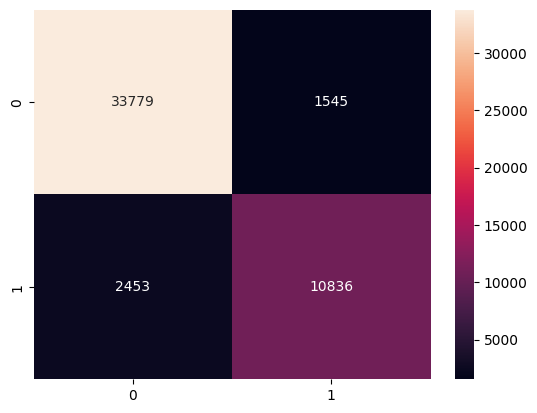

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test["label_n"], preds.round())
sns.heatmap(confusion_matrix(y_test["label_n"], preds.round()), annot=True, fmt="d")

Performance are pretty good as we achieve 92% of accuracy on the test dataset which is better than the LSTM or the MLP

Let's see which feature is the most important

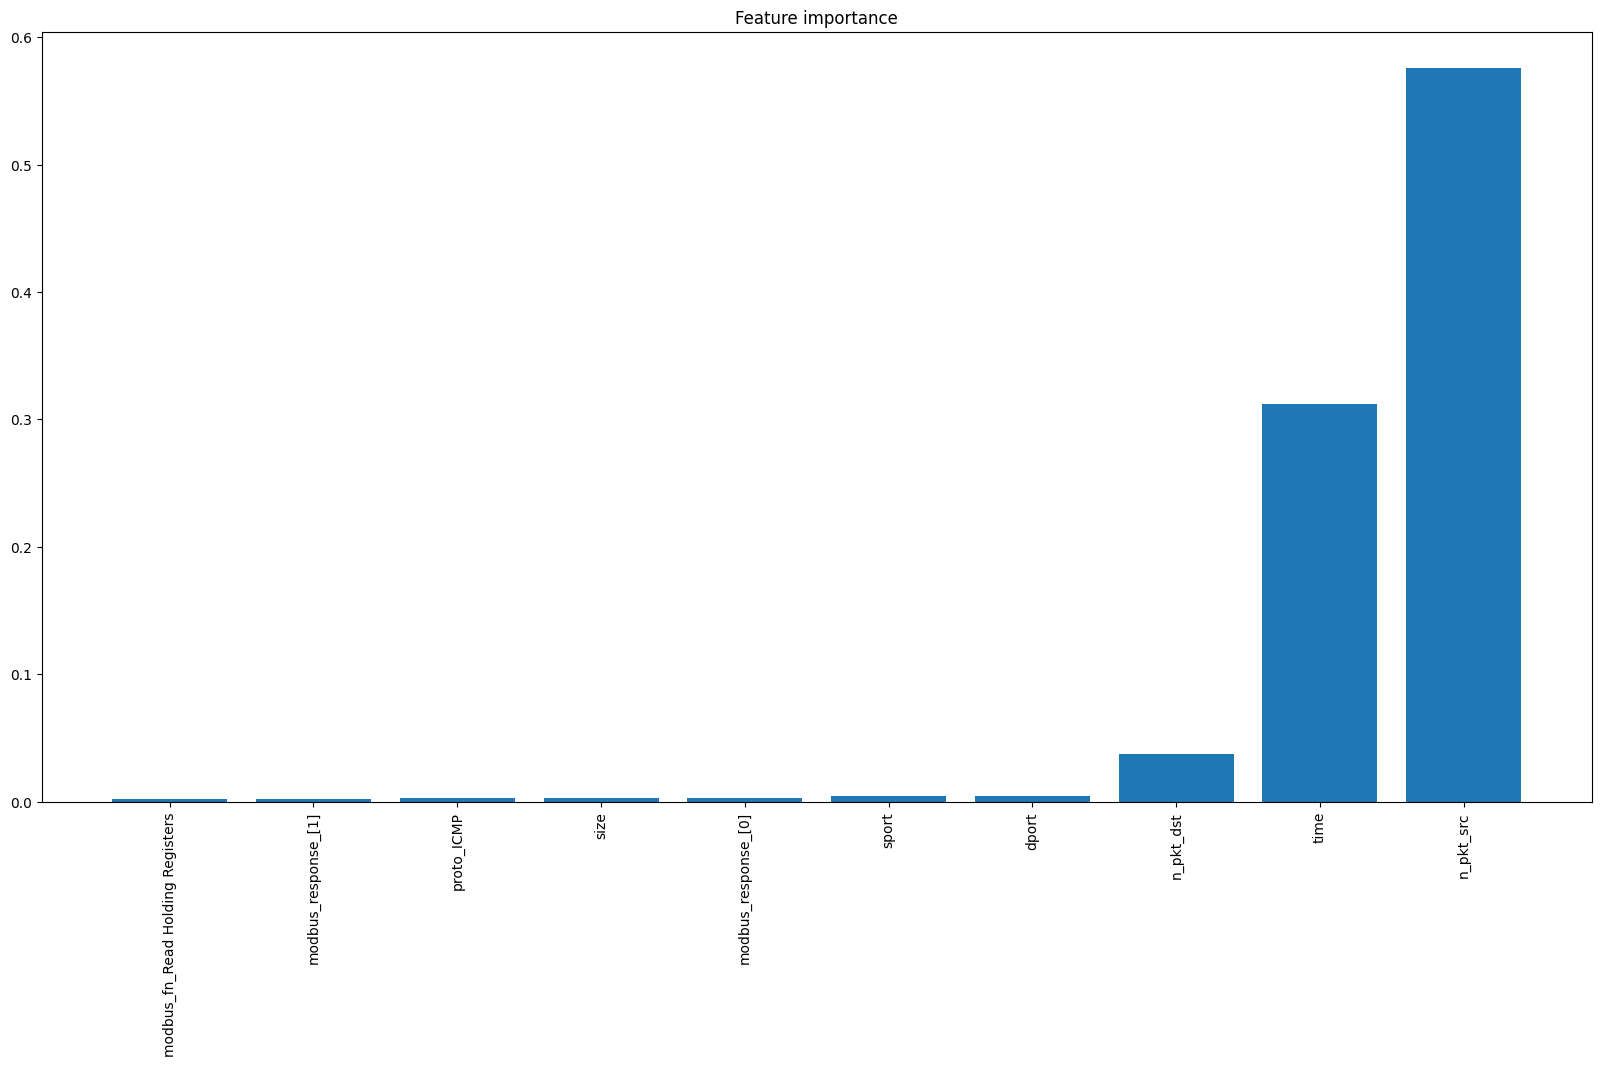

In [31]:
# plot feature importance
importance = clf.feature_importances_
# keep 10 most important features
idx = np.argsort(importance)[-10:]
importance = importance[idx]
# plot feature importance
plt.figure(figsize=(20, 10))
plt.title("Feature importance")
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X_train.columns[idx], rotation='vertical')
plt.show()

We surely don't want the time to impact the classifier so let's remove it

In [32]:
df_network_prepared = df_network_prepared.drop(columns=["time"])

X_train, X_test, y_train, y_test = train_test_split(df_network_prepared, df_network_labels[["new_labels", "label_n"]], test_size=0.2, random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194452, 1985), (48613, 1985), (194452, 2), (48613, 2))

In [33]:
clf = DecisionTreeClassifier(random_state=random_state)
clf.fit(X_train, y_train["label_n"])

DecisionTreeClassifier(random_state=42)

In [34]:
preds = clf.predict(X_test)

In [35]:
print("Accuracy: ", accuracy_score(y_test["label_n"], preds.round()))
print("Precision: ", precision_score(y_test["label_n"], preds.round()))
print("Recall: ", recall_score(y_test["label_n"], preds.round()))
print("F1: ", f1_score(y_test["label_n"], preds.round()))
print("ROC AUC: ", roc_auc_score(y_test["label_n"], preds))

Accuracy:  0.8758356818135067
Precision:  0.9165996553704767
Recall:  0.6004214011588532
F1:  0.725561516777303
ROC AUC:  0.7899344011795851


<Axes: >

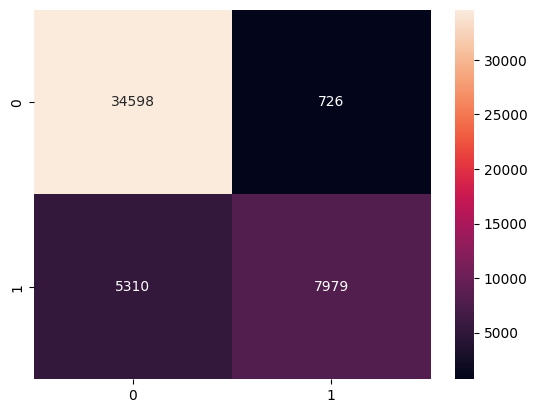

In [36]:
confusion_matrix(y_test["label_n"], preds.round())
sns.heatmap(confusion_matrix(y_test["label_n"], preds.round()), annot=True, fmt="d")

As we could expect, the classifier struggles more without the time information. This is still a good thing to remove it, because we don't want to rely on it. We need to be able to detect an attack even if it happens at a different time

In [37]:
# let's try to do multi class classification
clf = DecisionTreeClassifier(random_state=random_state)
clf.fit(X_train, y_train["new_labels"])

DecisionTreeClassifier(random_state=42)

In [38]:
preds = clf.predict(X_test)

In [39]:
print("Accuracy: ", accuracy_score(y_test["new_labels"], preds.round()))
print("Precision: ", precision_score(y_test["new_labels"], preds.round(), average="macro"))
print("Recall: ", recall_score(y_test["new_labels"], preds.round(), average="macro"))
print("F1: ", f1_score(y_test["new_labels"], preds.round(), average="macro"))

Accuracy:  0.8742106021023183
Precision:  0.725731321789917
Recall:  0.6288012868530682
F1:  0.6396265869612296


<Axes: >

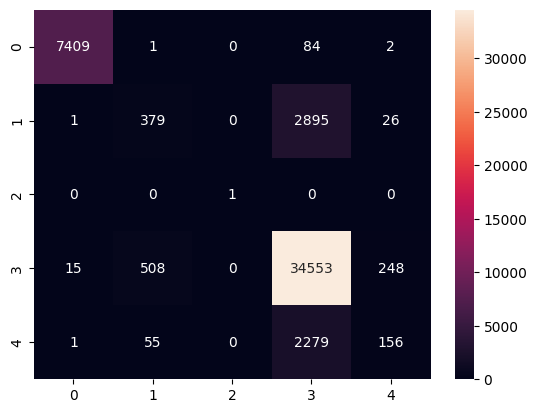

In [40]:
confusion_matrix(y_test["new_labels"], preds.round())
sns.heatmap(confusion_matrix(y_test["new_labels"], preds.round()), annot=True, fmt="d")